In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from PIL import Image
%matplotlib inline
import os

In [2]:
file_Path = 'G:/Xinhua/ROI/A/06-LC-roi.bmp'

In [3]:
fileNameList = []
for _,_,fileNames in os.walk('G:/Xinhua/ROI/A/'):
    for fileName in fileNames:
        if 'roi' in fileName:
            fileNameList.append(fileName)
print(fileNameList)

['01-LC-roi.bmp', '01-LM-roi.bmp', '02-LC-roi.bmp', '02-LM-roi.bmp', '02-RC-roi.bmp', '02-RM-roi.bmp', '03-LC-roi.bmp', '03-LM-roi.bmp', '04-RC-roi.bmp', '04-RM-roi.bmp', '05-RC-roi.bmp', '05-RM-roi.bmp', '06-LC-roi.bmp', '06-LM-roi.bmp', '07-LM-roi.bmp', '08-LC-roi.bmp', '08-LM-roi.bmp', '09-RC-roi.bmp', '09-RM-roi.bmp', '10-LC-roi.bmp', '10-LM-roi.bmp', '11-RC-roi.bmp', '11-RM-roi.bmp', '12-RC-roi.bmp', '12-RM-roi.bmp', '13-RC-roi.bmp', '13-RM-roi.bmp', '14-LC-roi.bmp', '14-LM-roi.bmp', '15-RC-roi.bmp', '15-RM-roi.bmp', '16-LC-roi.bmp', '16-LM-roi.bmp', '17-LC-roi.bmp', '17-LM-roi.bmp', '18-RC-roi.bmp', '18-RM-roi.bmp', '19-LC-roi.bmp', '19-LM-roi.bmp', '20-LC-roi.bmp', '20-LM-roi.bmp', '21-LC-roi.bmp', '21-LM-roi.bmp', '22-LC-roi.bmp', '22-LM-roi.bmp', '23-LC-roi.bmp', '23-LM-roi.bmp', '24-RC-roi.bmp', '24-RM-roi.bmp', '25-LC-roi.bmp', '25-LM-roi.bmp', '26-RC-roi.bmp', '26-RM-roi.bmp', '27-LC-roi.bmp', '27-LM-roi.bmp', '27-RC-roi.bmp', '27-RM-roi.bmp', '28-LC-roi.bmp', '28-LM-roi.bm

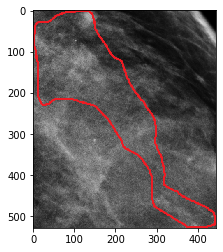

In [4]:
roi_im = Image.open(file_Path)
plt.imshow(roi_im)

In [5]:
def pixel_wanted(pix):
    return pix==(237,28, 36)

In [6]:
def Cal_S(im):
    coordinateList = []
    top_pixel = (0,0,0)
    for x in range(im.size[0]):
        flag=False
        for y in range(im.size[1]):
            #当前像素点
            current_pixel = im.getpixel((x,y))
            last_pixel = im.getpixel((x,y-1)) if y>0 else top_pixel
            if pixel_wanted(current_pixel)and not pixel_wanted(last_pixel):
                flag = True
            if flag and not pixel_wanted(current_pixel):
                flag = False
            if(flag):
                coordinateList.append((x,y))
    min_max_coordinate_list=[]
    for i in range(im.size[0]):
        for coordinate in coordinateList:
            if coordinate[0]==i:
                min = coordinate[1]
                max = coordinate[1]
                break
        for coordinate in coordinateList:
            if coordinate[0]==i:
                if coordinate[1]>max:
                    max = coordinate[1]
        min_max_coordinate_list.append(min)
        min_max_coordinate_list.append(max)
    i=0;
    for x in range(im.size[0]):
        for y in range(im.size[1]):
            min = min_max_coordinate_list[x*2]
            max = min_max_coordinate_list[x*2+1]
            if min<y<max:
                im.putpixel((x,y),(0,255,0))
                i+=1
            else:
                pass
#                 im.putpixel((x,y),(147,147,147))
    return im

In [7]:
import os
from PIL import Image

#打开图片
def image_open(path, filename):
    try:
        Image.open(path+'/'+filename)
    except:
        print("打开"+filename+"图片失败")
    else:
        return Image.open(path+'/'+filename)

#保存图片
def image_save(im, path, filename):
    try:
        if not os.path.exists(path):
            os.makedirs(path)
        im.save(path + '/' + filename)
    except:
        print('图片'+filename+'保存失败')


In [8]:
file_Path = 'G:/Xinhua/ROI/C/'
save_Path = 'G:/Xinhua/ROI_Cal_S/C'
fileNameList = []
for _,_,fileNames in os.walk(file_Path):
    for fileName in fileNames:
        if 'roi' in fileName:
            fileNameList.append(fileName)
for fileName in fileNameList:
#     print(file_Path+fileName)
    im = Image.open(file_Path+fileName)
    im = Cal_S(im)
    roi_im = Image.open(file_Path+fileName)
    image_save(im, save_Path, fileName.replace('.bmp','-show.bmp'))
    image_save(roi_im,save_Path,fileName)

S占比0.29402625683117317


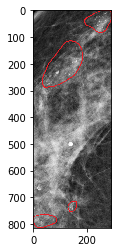

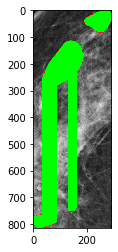

In [18]:
file_Path = 'G:/Xinhua/ROI/C/87-RC-roi.bmp'
# im = Image.open('G:/Xinhua/ROI/A/02-LC-roi.bmp')
im = Image.open(file_Path)
coordinateList = []
top_pixel = (0,0,0)
for x in range(im.size[0]):
    flag=False
    for y in range(im.size[1]):
        #当前像素点
        current_pixel = im.getpixel((x,y))
        last_pixel = im.getpixel((x,y-1)) if y>0 else top_pixel
        if pixel_wanted(current_pixel)and not pixel_wanted(last_pixel):
            flag = True
        if flag and not pixel_wanted(current_pixel):
            flag = False
        if(flag):
            coordinateList.append((x,y))

# for coordinate in coordinateList:
#     im.putpixel(coordinate,(0,255,0))
# plt.imshow(im)
min_max_coordinate_list=[]
for i in range(im.size[0]):
    for coordinate in coordinateList:
        if coordinate[0]==i:
            min = coordinate[1]
            max = coordinate[1]
#             print("初始化的min和max",(min,max))
            break
    for coordinate in coordinateList:
        if coordinate[0]==i:
#             print("找到横座标相同点为",coordinate)
            if coordinate[1]>max:
#                 print("找到新的最大纵座标为",coordinate[1])
                max = coordinate[1]
    min_max_coordinate_list.append(min)
    min_max_coordinate_list.append(max)

i=0;
list_by_x = []
for x in range(im.size[0]):
    for y in range(im.size[1]):
        min = min_max_coordinate_list[x*2]
        max = min_max_coordinate_list[x*2+1]
#         print(min,max)
        if min<y<max:
            list_by_x.append((x,y))
            im.putpixel((x,y),(0,255,0))
            i+=1
        else:
            pass
#             im.putpixel((x,y),(147,147,147))
tmp_im = im
roi_im = Image.open(file_Path)
print("S占比{}".format(i/(im.size[0]*im.size[1])))
plt.figure()
plt.imshow(roi_im)
plt.figure()
plt.imshow(im) 

In [19]:
file_Path = 'G:/Xinhua/ROI/C/87-RC-roi.bmp'
# im = Image.open('G:/Xinhua/ROI/A/02-LC-roi.bmp')
im = Image.open(file_Path)
coordinateList = []
top_pixel = (0,0,0)
for y in range(im.size[1]):
    flag=False
    for x in range(im.size[0]):
        #当前像素点
        current_pixel = im.getpixel((x,y))
        last_pixel = im.getpixel((x-1,y)) if x>0 else top_pixel
        if pixel_wanted(current_pixel)and not pixel_wanted(last_pixel):
            flag = True
        if flag and not pixel_wanted(current_pixel):
            flag = False
        if(flag):
            coordinateList.append((x,y))
# for coordinate in coordinateList:
#     im.putpixel(coordinate,(0,255,0))
# plt.imshow(im)
for coordinate in coordinateList:
    print(coordinate)

(257, 0)
(258, 0)
(259, 0)
(260, 0)
(261, 0)
(262, 0)
(263, 0)
(264, 0)
(265, 0)
(266, 0)
(267, 0)
(268, 0)
(269, 0)
(270, 0)
(271, 0)
(272, 0)
(273, 0)
(274, 0)
(275, 0)
(276, 0)
(277, 0)
(278, 0)
(279, 0)
(280, 0)
(252, 1)
(253, 1)
(254, 1)
(255, 1)
(256, 1)
(257, 1)
(258, 1)
(259, 1)
(260, 1)
(261, 1)
(262, 1)
(263, 1)
(264, 1)
(265, 1)
(266, 1)
(267, 1)
(268, 1)
(269, 1)
(270, 1)
(271, 1)
(272, 1)
(273, 1)
(274, 1)
(275, 1)
(276, 1)
(277, 1)
(278, 1)
(279, 1)
(280, 1)
(281, 1)
(282, 1)
(283, 1)
(249, 2)
(250, 2)
(251, 2)
(252, 2)
(253, 2)
(254, 2)
(255, 2)
(256, 2)
(257, 2)
(258, 2)
(259, 2)
(260, 2)
(261, 2)
(262, 2)
(263, 2)
(264, 2)
(265, 2)
(266, 2)
(267, 2)
(268, 2)
(269, 2)
(270, 2)
(271, 2)
(272, 2)
(273, 2)
(274, 2)
(275, 2)
(276, 2)
(277, 2)
(278, 2)
(279, 2)
(280, 2)
(281, 2)
(282, 2)
(283, 2)
(284, 2)
(248, 3)
(249, 3)
(250, 3)
(251, 3)
(252, 3)
(253, 3)
(254, 3)
(255, 3)
(256, 3)
(281, 3)
(282, 3)
(283, 3)
(284, 3)
(285, 3)
(244, 4)
(245, 4)
(246, 4)
(247, 4)
(248, 4)
(

(72, 801)
(4, 802)
(5, 802)
(6, 802)
(63, 802)
(64, 802)
(65, 802)
(66, 802)
(67, 802)
(68, 802)
(69, 802)
(5, 803)
(6, 803)
(7, 803)
(60, 803)
(61, 803)
(62, 803)
(63, 803)
(64, 803)
(65, 803)
(66, 803)
(6, 804)
(7, 804)
(8, 804)
(57, 804)
(58, 804)
(59, 804)
(60, 804)
(61, 804)
(62, 804)
(63, 804)
(7, 805)
(8, 805)
(54, 805)
(55, 805)
(56, 805)
(57, 805)
(58, 805)
(59, 805)
(60, 805)
(61, 805)
(62, 805)
(7, 806)
(8, 806)
(9, 806)
(52, 806)
(53, 806)
(54, 806)
(55, 806)
(56, 806)
(57, 806)
(58, 806)
(59, 806)
(8, 807)
(9, 807)
(10, 807)
(48, 807)
(49, 807)
(50, 807)
(51, 807)
(52, 807)
(53, 807)
(54, 807)
(55, 807)
(56, 807)
(9, 808)
(10, 808)
(11, 808)
(45, 808)
(46, 808)
(47, 808)
(48, 808)
(49, 808)
(50, 808)
(51, 808)
(52, 808)
(53, 808)
(10, 809)
(11, 809)
(12, 809)
(42, 809)
(43, 809)
(44, 809)
(45, 809)
(46, 809)
(47, 809)
(48, 809)
(49, 809)
(50, 809)
(51, 809)
(11, 810)
(12, 810)
(13, 810)
(39, 810)
(40, 810)
(41, 810)
(42, 810)
(43, 810)
(44, 810)
(45, 810)
(46, 810)
(47, 81

In [20]:
min_max_coordinate_list=[]
for i in range(im.size[1]):
    min=-1
    max=-1
    for coordinate in coordinateList:
        if coordinate[1]==i:
            min = coordinate[0]
            max = coordinate[0]
#             print("初始化的min和max",(min,max))
            break
    for coordinate in coordinateList:
        if coordinate[1]==i:
#             print("找到纵座标相同点为",coordinate)
            if coordinate[0]>max:
#                 print("找到新的最大横座标为",coordinate[0])
                max = coordinate[0]
            if coordinate[0]<min:
#                 print("找到新的最小横座标为",coordinate[0])
                min = coordinate[0]
    min_max_coordinate_list.append(min)
    min_max_coordinate_list.append(max)
print(min_max_coordinate_list)

[257, 280, 252, 283, 249, 284, 248, 285, 244, 286, 242, 287, 238, 288, 237, 289, 235, 289, 233, 290, 230, 291, 229, 291, 226, 291, 224, 292, 222, 292, 221, 292, 219, 292, 217, 292, 215, 292, 213, 292, 212, 292, 210, 292, 208, 292, 206, 292, 205, 292, 203, 292, 201, 292, 199, 292, 198, 292, 197, 292, 195, 292, 194, 292, 193, 292, 193, 292, 192, 292, 191, 291, 190, 291, 190, 291, 190, 290, 190, 290, 190, 289, 190, 289, 190, 288, 190, 288, 191, 287, 191, 287, 191, 286, 192, 286, 192, 285, 193, 284, 193, 284, 193, 283, 194, 283, 194, 282, 195, 282, 195, 281, 196, 280, 197, 280, 199, 280, 203, 279, 204, 279, 208, 278, 211, 278, 213, 278, 214, 277, 216, 276, 219, 276, 220, 275, 221, 275, 222, 274, 224, 274, 225, 273, 225, 272, 227, 271, 228, 270, 229, 270, 230, 269, 231, 267, 232, 267, 233, 266, 234, 265, 236, 264, 238, 262, 240, 260, 242, 258, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

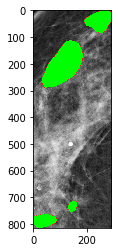

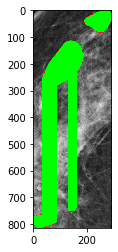

In [21]:
for y in range(im.size[1]):
    for x in range(im.size[0]):
        try:
            min = min_max_coordinate_list[y*2]
            max = min_max_coordinate_list[y*2+1]
            if min<x<max:
                im.putpixel((x,y),(0,255,0))
            else:
                pass
#               im.putpixel((x,y),(147,147,147))
        except:
            continue
plt.imshow(im)
plt.figure()
plt.imshow(tmp_im)

NameError: name 'im' is not defined

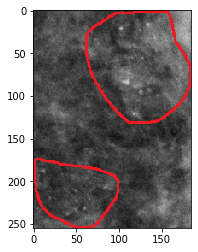

<Figure size 432x288 with 0 Axes>

In [3]:
file_Path = 'G:/Xinhua/ROI/A/29-LM-roi.bmp'
roi_im = Image.open(file_Path)
plt.imshow(roi_im)
plt.figure()
plt.imshow(im)
plt.figure()
plt.imshow(tmp_im)
for x in range(im.size[0]):
    for y in range(im.size[1]):
        if(im.getpixel((x,y))==(0,255,0) and tmp_im.getpixel((x,y))==(0,255,0)):
            roi_im.putpixel((x,y),(0,255,0))
plt.figure()
plt.imshow(roi_im)

In [14]:
2+3

5